In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import pandas as pd

In [2]:
def areaavgTS(areafile,var,timelength):
    """ 
    Var needs to be 3D
    time length = num timesteps
    """
    # area is 96x144
    ads = xr.open_dataset(areafile)
    area = ads['AREA']
    area3D = np.tile(area,(timelength,1,1))
    vararea = var*area3D
    sumVarArea = np.sum(vararea,axis=(1,2))
    sumArea = np.sum(area,axis=(0,1))
    #print(sumVarArea.shape)
    # error occurs here
    #print(sumArea)
    output_core_dims=[["time"]]
    ar_avgd = sumVarArea/float(sumArea)
    return ar_avgd

In [3]:
def get_difference_data(file1,file2,var,multiplier):
#file 1 is forcing file, file2 is reference
    dsFOR = xr.open_dataset(file1)
    dsCT = xr.open_dataset(file2)
    VAR_FOR = np.array(dsFOR[var])*multiplier
    VAR_CT = np.array(dsCT[var])*multiplier
    changeVAR = VAR_FOR[:,:,:]- VAR_CT[0:108,:,:]
    return changeVAR

In [4]:
fileCT = '/glade/work/smagahey/GEOG8130/data/project_results/my_cesm.B1850.f19_g17.project_preindustrial.cam.h0.0001-0010.nc'
filePERT = '/glade/work/smagahey/GEOG8130/data/project_results/my_cesm.B1850.f19_g17.ch4_perturbation.cam.h0.000101-000912.nc'
areafile = '/glade/work/smagahey/GEOG8130/data/project_results/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr1850_c190304.nc'


In [5]:
dsFOR = xr.open_dataset(filePERT)
dsCT = xr.open_dataset(fileCT)


In [6]:
"""
changeTREFHT= pd.Series(np.nanmean((get_difference_data(filePERT,fileCT,"TREFHT",1)),axis=(1,2)))
changeTMQ= pd.Series(np.nanmean((get_difference_data(filePERT,fileCT,"TMQ",1000)),axis=(1,2)))
changePRECT= pd.Series(np.nanmean((get_difference_data(filePERT,fileCT,"PRECT",1000*86400)),axis=(1,2)))
changeICE= pd.Series(np.nanmean((get_difference_data(filePERT,fileCT,"ICEFRAC",1)),axis=(1,2)))
changeCLD= pd.Series(np.nanmean((get_difference_data(filePERT,fileCT,"CLDTOT",1)),axis=(1,2)))
changeFLNT= pd.Series(np.nanmean((get_difference_data(filePERT,fileCT,"FLNT",1)),axis=(1,2)))
"""

'\nchangeTREFHT= pd.Series(np.nanmean((get_difference_data(filePERT,fileCT,"TREFHT",1)),axis=(1,2)))\nchangeTMQ= pd.Series(np.nanmean((get_difference_data(filePERT,fileCT,"TMQ",1000)),axis=(1,2)))\nchangePRECT= pd.Series(np.nanmean((get_difference_data(filePERT,fileCT,"PRECT",1000*86400)),axis=(1,2)))\nchangeICE= pd.Series(np.nanmean((get_difference_data(filePERT,fileCT,"ICEFRAC",1)),axis=(1,2)))\nchangeCLD= pd.Series(np.nanmean((get_difference_data(filePERT,fileCT,"CLDTOT",1)),axis=(1,2)))\nchangeFLNT= pd.Series(np.nanmean((get_difference_data(filePERT,fileCT,"FLNT",1)),axis=(1,2)))\n'

In [7]:
changeTREFHT= get_difference_data(filePERT,fileCT,"TREFHT",1)
changeTMQ= get_difference_data(filePERT,fileCT,"TMQ",1000)
changePRECT= get_difference_data(filePERT,fileCT,"PRECT",1000*86400)
changeICE= get_difference_data(filePERT,fileCT,"ICEFRAC",1)
changeCLD= get_difference_data(filePERT,fileCT,"CLDTOT",1)
changeFLNT= get_difference_data(filePERT,fileCT,"FLNT",1)

In [8]:

ar_changeT = pd.Series(areaavgTS(areafile,changeTREFHT,108))
ar_changeTMQ = pd.Series(areaavgTS(areafile,changeTMQ,108))
ar_changePRECT = pd.Series(areaavgTS(areafile,changePRECT,108))
ar_changeICE = pd.Series(areaavgTS(areafile,changeICE,108))
ar_changeCLD = pd.Series(areaavgTS(areafile,changeCLD,108))
ar_changeFLNT = pd.Series(areaavgTS(areafile,changeFLNT,108))


In [9]:
TREFHT = pd.Series(ar_changeT.rolling(12).mean())
CLD = pd.Series(ar_changeCLD.rolling(12).mean())
PRECT = pd.Series(ar_changePRECT.rolling(12).mean())
ICE = pd.Series(ar_changeICE.rolling(12).mean())
TMQ = pd.Series(ar_changeTMQ.rolling(12).mean())
FLNT = pd.Series(ar_changeFLNT.rolling(12).mean())

In [10]:
lat = np.linspace(-90,90,96)
lon = np.linspace(0,360,144)

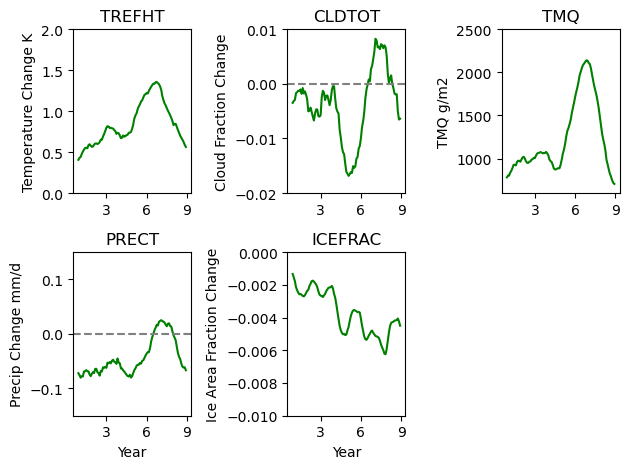

In [13]:
fig = plt.figure()
ticks = ([36,72,108])
labels = ([3,6,9])
ax1=fig.add_subplot(2,3,1)

plt.title('TREFHT') 
plt.plot(TREFHT,"green")
plt.ylabel("Temperature Change K")
plt.ylim(0,2)
plt.xticks(ticks,labels)
plt.tight_layout()

ax2 = fig.add_subplot(2,3,2)

plt.title('CLDTOT')
plt.ylabel("Cloud Fraction Change")
plt.ylim(-0.02,0.01)
plt.plot(CLD,"green")
plt.axhline(y=0, color='grey', linestyle='--')
plt.xticks(ticks,labels)
plt.tight_layout()

ax3 = fig.add_subplot(2,3,3)
plt.plot(TMQ,"green")
plt.ylabel("TMQ g/m2")
plt.ylim(600,2500)
plt.title('TMQ')
plt.xticks(ticks,labels)
plt.tight_layout()

ax4 = fig.add_subplot(2,3,4)
plt.plot(PRECT,"green")
plt.ylabel("Precip Change mm/d")
plt.ylim(-0.15,0.15)
plt.title('PRECT')
plt.axhline(y=0, color='grey', linestyle='--')
plt.xticks(ticks,labels)
plt.xlabel("Year")
plt.tight_layout()

ax5 = fig.add_subplot(2,3,5)
plt.plot(ICE,"green")
plt.ylabel("Ice Area Fraction Change")
plt.ylim(-0.01,0)
plt.title('ICEFRAC')
plt.xticks(ticks,labels)
plt.xlabel("Year")
plt.tight_layout()

#ax6 = fig.add_subplot(2,3,6)
"""
plt.plot(FLNT,"green")
plt.ylabel("Net TOA LW rad W/m2")
plt.ylim(-3,0)
plt.title('FLNT')
plt.xticks(ticks,labels)
plt.xlabel("Year")
plt.tight_layout()
"""
plt.savefig("timeseries_subplots.png")

plt.show()







